In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
%matplotlib inline

In [36]:
GunViol_DF = pd.read_csv("mass_shooting_events_stanford_msa_release_06142016.csv", parse_dates = ['Date'])
#popbygen2016 = pd.read_csv("popbygen2016.csv")

# Exploratory Analysis

> 1. Over time effects (Day, Month and Year)
    - Number of Victim Fatalities
    - Total Number of Fatalities
    - Number of Victims Injured
    - Total Number of Victims
2. By location
    - Number of Victim Fatalities
    - Total Number of Fatalities
    - Number of Victims Injured
    - Total Number of Victims
3. Relationship analysis
    - State
    - Shooter Age(s)
    - Average Shooter Age
    - Shooter Sex
    - Shooter Race
    - Type of Gun - Detailed
    - Type of Gun - General
    - Number of Rifles
    - Number of Handguns
    - School Related (yes, no)
    - Place Type (College/University/Adult education)
    - History of Mental Illness - General

In [37]:
GunViol_DF2 = pd.DataFrame()
GunViol_DF2['year'] = GunViol_DF['Date'].dt.year
GunViol_DF2['month'] = GunViol_DF['Date'].dt.month
GunViol_DF2['day'] = GunViol_DF['Date'].dt.day
GunViol_DF2['weekday'] = GunViol_DF['Date'].dt.weekday
GunViol_DF2["State"] = GunViol_DF["State"]
GunViol_DF2["Number of Victim Fatalities"] = GunViol_DF["Number of Victim Fatalities"]
GunViol_DF2["Total Number of Fatalities"] = GunViol_DF["Total Number of Fatalities"]
GunViol_DF2["Number of Victims Injured"] = GunViol_DF["Number of Victims Injured"]
GunViol_DF2["Total Number of Victims"] = GunViol_DF["Total Number of Victims"]
GunViol_DF2 = GunViol_DF2.dropna()

In [38]:
#Victim Fatalities per year
YearVictFat = []
for year in GunViol_DF2['year'].unique():
    EmptyList = []
    
    yearVicFat = GunViol_DF2[GunViol_DF2.year == year]["Number of Victim Fatalities"].sum()
    yearTotFat = GunViol_DF2[GunViol_DF2.year == year]["Total Number of Fatalities"].sum()
    yearVicInj = GunViol_DF2[GunViol_DF2.year == year]["Number of Victims Injured"].sum()
    yearTotVic = GunViol_DF2[GunViol_DF2.year == year]["Total Number of Victims"].sum()
    
    EmptyList = [year, yearVicFat, yearTotFat, yearVicInj, yearTotVic]
    YearVictFat.append(EmptyList)

YearVictFat = pd.DataFrame(YearVictFat)
YearVictFat.columns = ["Year", "Number of Victim Fatalities", "Total Number of Fatalities", "Number of Victims Injured", "Total Number of Victims"]
YearVictFat = YearVictFat.sort_values("Year")

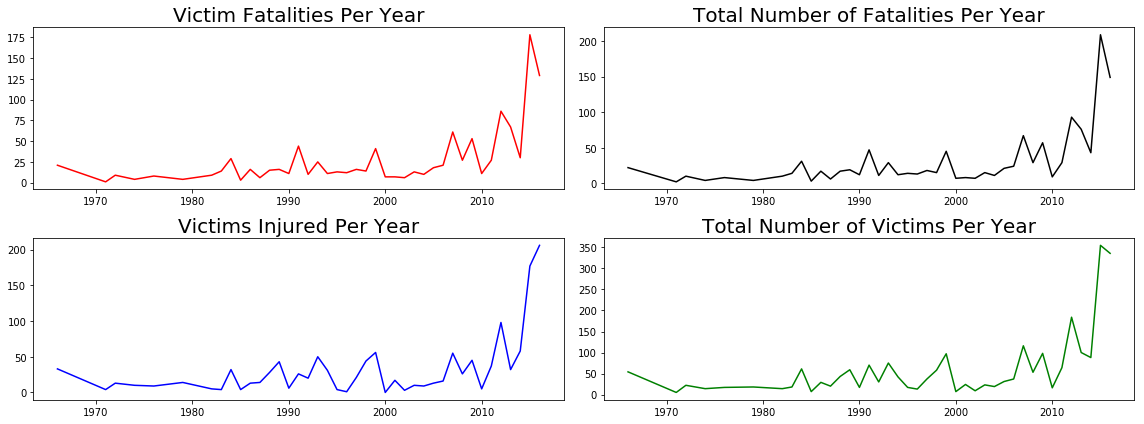

In [39]:
#Number of Victim Fatalities per year, month and day

fig = plt.figure(figsize=(16, 6))


ax1 = fig.add_subplot(221)
ax1.plot(YearVictFat["Year"], YearVictFat["Number of Victim Fatalities"], 'r-')
ax1.set_title('Victim Fatalities Per Year',  fontsize=20)

ax2 = fig.add_subplot(222)
ax2.plot(YearVictFat["Year"], YearVictFat["Total Number of Fatalities"], 'k-')
ax2.set_title('Total Number of Fatalities Per Year',  fontsize=20)

ax3 = fig.add_subplot(223)
ax3.plot(YearVictFat["Year"], YearVictFat["Number of Victims Injured"], 'b-')
ax3.set_title('Victims Injured Per Year',  fontsize=20)

ax4 = fig.add_subplot(224)
ax4.plot(YearVictFat["Year"], YearVictFat["Total Number of Victims"], 'g-')
ax4.set_title('Total Number of Victims Per Year',  fontsize=20)

#ax.set_xlabel('common xlabel')
#ax.set_ylabel('common ylabel')


plt.tight_layout()
fig = plt.gcf()

In [40]:
#Victim Fatalities per month
MonthVictFat = []
for month in GunViol_DF2['month'].unique():
    EmptyList = []
    
    MVicFat = GunViol_DF2[GunViol_DF2.month == month]["Number of Victim Fatalities"].sum()
    MTotFat = GunViol_DF2[GunViol_DF2.month == month]["Total Number of Fatalities"].sum()
    MVicInj = GunViol_DF2[GunViol_DF2.month == month]["Number of Victims Injured"].sum()
    MTotVic = GunViol_DF2[GunViol_DF2.month == month]["Total Number of Victims"].sum()
    
    EmptyList = [month, MVicFat, MTotFat, MVicInj, MTotVic]
    MonthVictFat.append(EmptyList)
MonthVictFat = pd.DataFrame(MonthVictFat)
MonthVictFat.columns = ["Month", "Number of Victim Fatalities", "Total Number of Fatalities", "Number of Victims Injured", "Total Number of Victims"]
MonthVictFat = MonthVictFat.sort_values("Month")

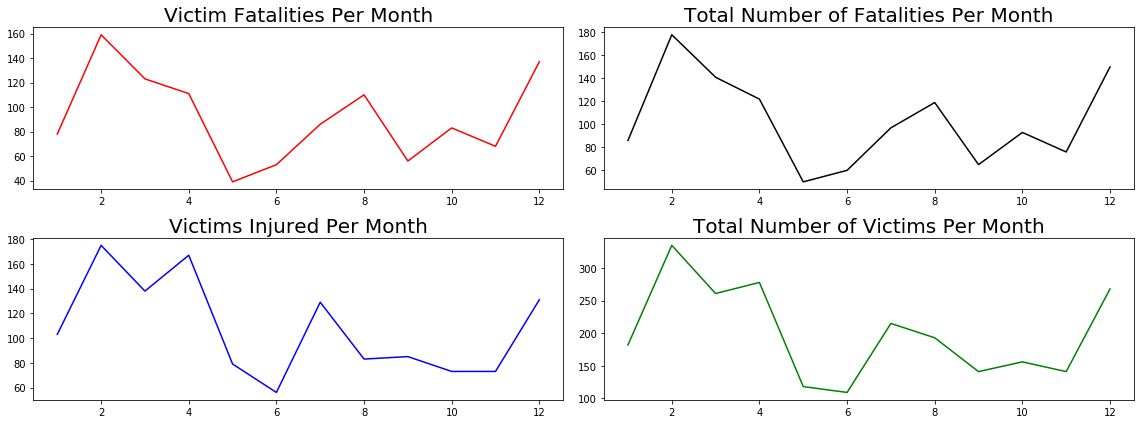

In [41]:
#Number of Victim Fatalities per year, month and day

fig = plt.figure(figsize=(16, 6))


ax1 = fig.add_subplot(221)
ax1.plot(MonthVictFat["Month"], MonthVictFat["Number of Victim Fatalities"], 'r-')
ax1.set_title('Victim Fatalities Per Month',  fontsize=20)

ax2 = fig.add_subplot(222)
ax2.plot(MonthVictFat["Month"], MonthVictFat["Total Number of Fatalities"], 'k-')
ax2.set_title('Total Number of Fatalities Per Month',  fontsize=20)

ax3 = fig.add_subplot(223)
ax3.plot(MonthVictFat["Month"], MonthVictFat["Number of Victims Injured"], 'b-')
ax3.set_title('Victims Injured Per Month',  fontsize=20)

ax4 = fig.add_subplot(224)
ax4.plot(MonthVictFat["Month"], MonthVictFat["Total Number of Victims"], 'g-')
ax4.set_title('Total Number of Victims Per Month',  fontsize=20)

#ax.set_xlabel('common xlabel')
#ax.set_ylabel('common ylabel')


plt.tight_layout()
fig = plt.gcf()

In [42]:
#Victim Fatalities per month
WeekDayVictFat = []
for WeekDay in GunViol_DF2['weekday'].unique():
    EmptyList = []
    
    WeekDayVicFat = GunViol_DF2[GunViol_DF2.weekday == WeekDay]["Number of Victim Fatalities"].sum()
    WeekDayTotFat = GunViol_DF2[GunViol_DF2.weekday == WeekDay]["Total Number of Fatalities"].sum()
    WeekDayVicInj = GunViol_DF2[GunViol_DF2.weekday == WeekDay]["Number of Victims Injured"].sum()
    WeekDayTotVic = GunViol_DF2[GunViol_DF2.weekday == WeekDay]["Total Number of Victims"].sum()
    
    EmptyList = [WeekDay, WeekDayVicFat, WeekDayTotFat, WeekDayVicInj, WeekDayTotVic]
    WeekDayVictFat.append(EmptyList)
WeekDayVictFat = pd.DataFrame(WeekDayVictFat)
WeekDayVictFat.columns = ["WeekDay", "Number of Victim Fatalities", "Total Number of Fatalities", "Number of Victims Injured", "Total Number of Victims"]
WeekDayVictFat = WeekDayVictFat.sort_values("WeekDay")

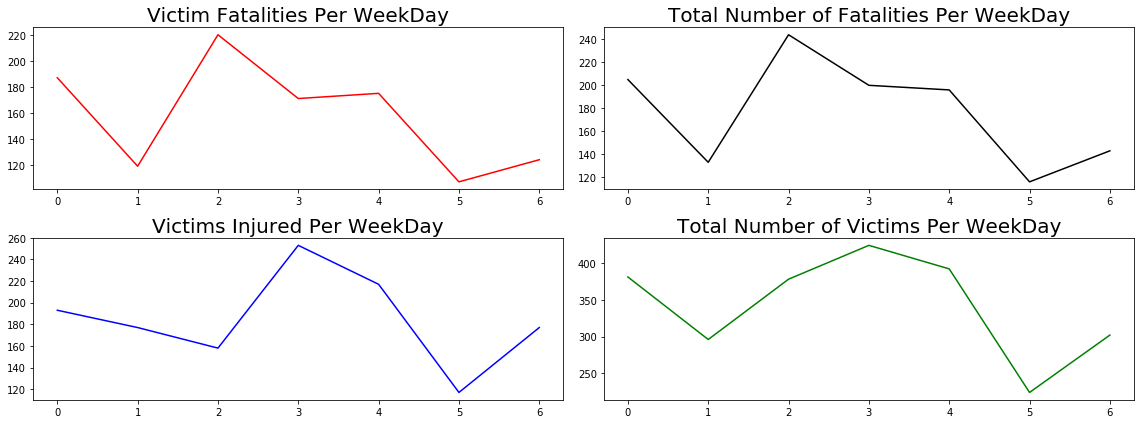

In [43]:
#Number of Victim Fatalities per year, month and day

fig = plt.figure(figsize=(16, 6))


ax1 = fig.add_subplot(221)
ax1.plot(WeekDayVictFat["WeekDay"], WeekDayVictFat["Number of Victim Fatalities"], 'r-')
ax1.set_title('Victim Fatalities Per WeekDay',  fontsize=20)

ax2 = fig.add_subplot(222)
ax2.plot(WeekDayVictFat["WeekDay"], WeekDayVictFat["Total Number of Fatalities"], 'k-')
ax2.set_title('Total Number of Fatalities Per WeekDay',  fontsize=20)

ax3 = fig.add_subplot(223)
ax3.plot(WeekDayVictFat["WeekDay"], WeekDayVictFat["Number of Victims Injured"], 'b-')
ax3.set_title('Victims Injured Per WeekDay',  fontsize=20)

ax4 = fig.add_subplot(224)
ax4.plot(WeekDayVictFat["WeekDay"], WeekDayVictFat["Total Number of Victims"], 'g-')
ax4.set_title('Total Number of Victims Per WeekDay',  fontsize=20)

#ax.set_xlabel('common xlabel')
#ax.set_ylabel('common ylabel')


plt.tight_layout()
fig = plt.gcf()

In [44]:
#Number of Victim Fatalities by location
StateVictFat = []
for WeekDay in GunViol_DF2['State'].unique():
    EmptyList = []
    
    StateVicFat = GunViol_DF2[GunViol_DF2.State == WeekDay]["Number of Victim Fatalities"].sum()
    StateTotFat = GunViol_DF2[GunViol_DF2.State == WeekDay]["Total Number of Fatalities"].sum()
    StateVicInj = GunViol_DF2[GunViol_DF2.State == WeekDay]["Number of Victims Injured"].sum()
    StateTotVic = GunViol_DF2[GunViol_DF2.State == WeekDay]["Total Number of Victims"].sum()
    
    EmptyList = [WeekDay, StateVicFat, StateTotFat, StateVicInj, StateTotVic]
    StateVictFat.append(EmptyList)
StateVictFat = pd.DataFrame(StateVictFat)
StateVictFat.columns = ["State", "Number of Victim Fatalities", "Total Number of Fatalities", "Number of Victims Injured", "Total Number of Victims"]

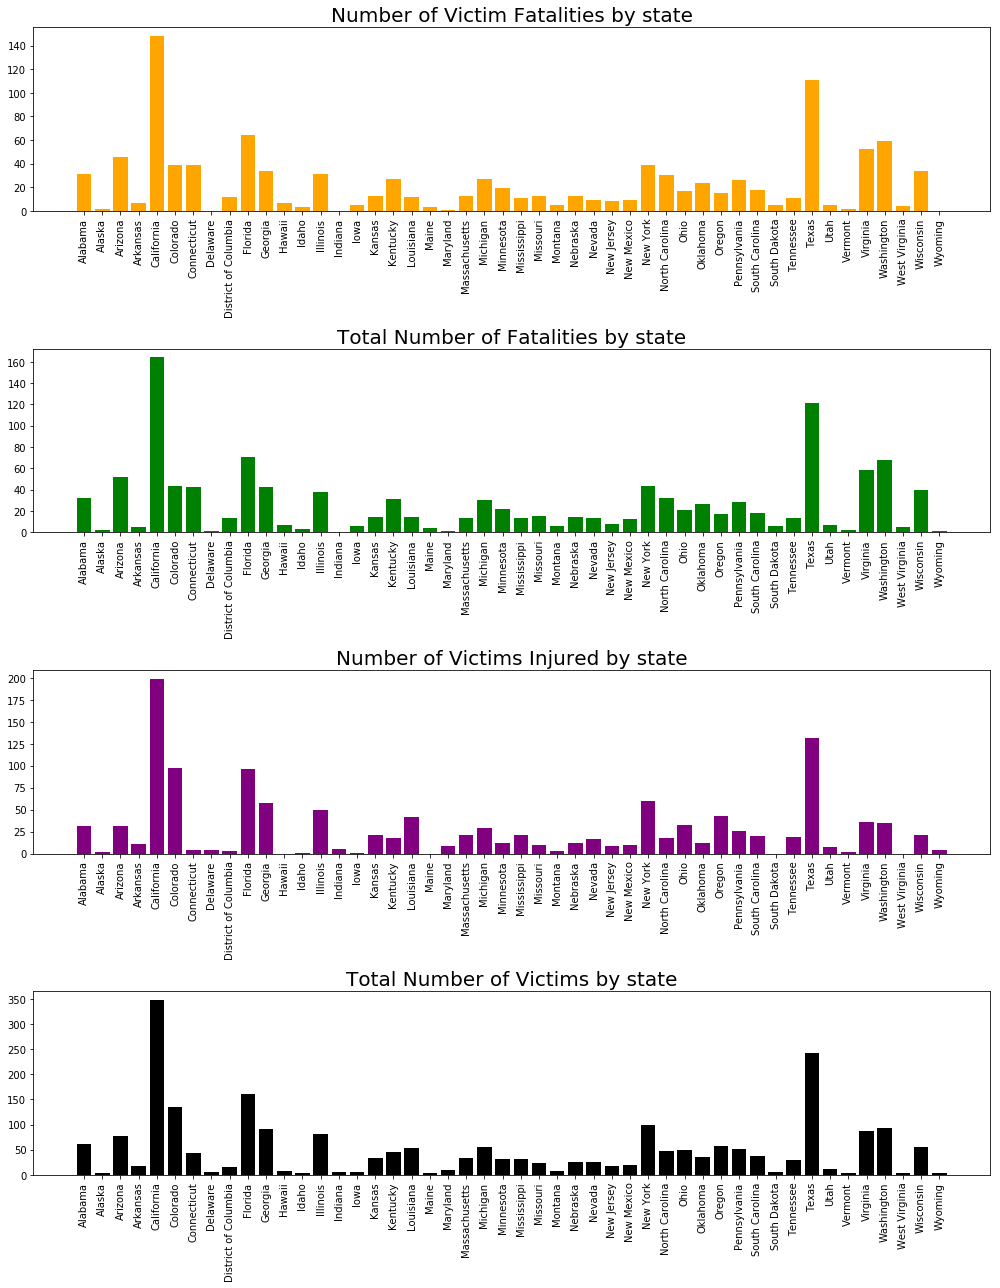

In [45]:
#Number of Victim Fatalities per year, month and day

fig = plt.figure(figsize=(14, 18))

p1 = fig.add_subplot(411)
p1 = plt.bar(StateVictFat["State"], StateVictFat["Number of Victim Fatalities"], color="orange")
plt.xticks(rotation='vertical')
plt.title('Number of Victim Fatalities by state',fontsize=20)

p2 = fig.add_subplot(412)
p2 = plt.bar(StateVictFat["State"], StateVictFat["Total Number of Fatalities"], color="green")
plt.xticks(rotation='vertical')
plt.title('Total Number of Fatalities by state',fontsize=20)

p3 = fig.add_subplot(413)
p3 = plt.bar(StateVictFat["State"], StateVictFat["Number of Victims Injured"], color="purple")
plt.xticks(rotation='vertical')
plt.title('Number of Victims Injured by state',fontsize=20)

p3 = fig.add_subplot(414)
p3 = plt.bar(StateVictFat["State"], StateVictFat["Total Number of Victims"], color= "black")
plt.xticks(rotation='vertical')
plt.title('Total Number of Victims by state',fontsize=20)

plt.tight_layout()
fig = plt.gcf()

## The problem
> Will increasing the age restriction of possessing gun to 21 from 18 reduce gun violence as suggested by many anti-gun advocates?

## The potential solution
> Younger citizens are incapable of making a sound judgment therefore restricting access to gun will make general population saver.<br>

## The method of testing the solution
>Currently, all the states have 18-year-old minimum age restriction for owning any type of firearms.  Dived the data set “mass_shooting_events_stanford_msa_release_06142016.csv” into 18 and under exclusive and 18 and over inclusive and compare the datasets to determine if the violence is curbed by age.<br>
If the violence is curbed by age restriction than we should advocate for it. If not than we should look for other means of reducing the violence or wait for more data to arrive and revisit the issue.<br>
young vs old "will the current law hold?" age no effect<br>
age limit (just two group) variance diff "say so" age no effect<br>
long gun vs handgun age limit <br>

In [46]:
se = []
for index, row in GunViol_DF.dropna(subset=['Shooter Age(s)']).iterrows():
    k = '\r'
    x = ' '.join(row["Shooter Age(s)"].split('/'))
    x = ' '.join(x.split(','))
    x = ' '.join(x.split(k))
    x = x.split(' ')
    se += x

se = pd.DataFrame(se)
se.columns = ['Age']
se2 = se["Age"] = se[se["Age"] != "+"]
se2 = se["Age"] = se[se["Age"] != "Unknown"]
se2 = se["Age"] = se[se["Age"] != "more"]
se2 = se.sort_values("Age")
se2 = se.drop([222, 219, 218, 223, 216]).dropna()
se2 = pd.to_numeric(se2["Age"])
se2 = pd.DataFrame(se2)
se2.columns = ['Age']

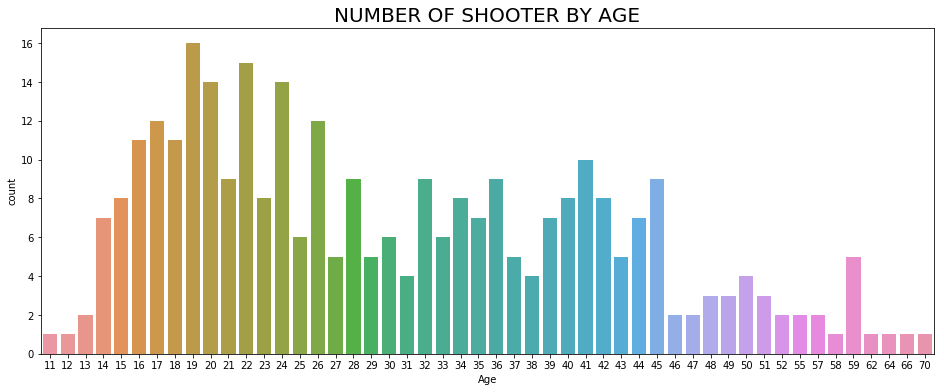

In [47]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data=se2, x = 'Age')
plt.title('NUMBER OF SHOOTER BY AGE',fontsize=20)
plt.show()

### Number of shooter by age shown above, agrees with accessment that with increasing age people are less likly to be the perpatrator. 


# A/B test
The test will be conducded on two groups, over 18 and under 18, and those groups will be represented by subset of the age groups that tented to be less different from each other to control variance. For example, under 18 will be represented by 14 to 17 inclusive because under 13 group differ in some variable that is casuing the number of shooter to spike after age 13. Same with the over 18 group, we picked 18 (inclusive) to 45 because after 18 there is a sharp drop.

In [48]:
#lessthan18 = se2.loc[((se2["Age"] >= 14) & (se2["Age"] < 18)), ["Age"]]
#over18 = se2.loc[((se2["Age"] >= 18) & (se2["Age"] <= 21)), ["Age"]]

under18 = []
over18 = []
testsetDF = pd.DataFrame()
for age in se2["Age"]:
    if (age >= 14) & (age < 18):
        under18.append(1)
    else:
        under18.append(0)
        
for age in se2["Age"]:
    if (age >= 18) & (age < 45):
        over18.append(1)
    else:
        over18.append(0)

testsetDF["under18"] = under18
testsetDF["over18"] = over18
testsetDF.head()
se2["Age"].count()

311

In [79]:
under18 = []
over18 = []
testsetDF = pd.DataFrame()
for age in se2["Age"].unique():
    emptylist = []
    if [(age >= 14) & (age < 18)]:
        k = len(se2[se2.Age == age])
        emptylist = [age, k]
    under18.append(emptylist)

testsetDF = pd.DataFrame(under18)
testsetDF.columns = ["Age","Count"]
#testsetDF["over18"] = over18
#testsetDF.head()
testsetDF = testsetDF.sort_values(by=['Age'])

In [88]:
k = testsetDF[7:35]
k

,Age,Count
1,18,11
7,19,16
26,20,14
44,21,9
9,22,15
2,23,8
10,24,14
0,25,6
31,26,12
40,27,5


In [86]:
#us18pop = popbygen2016["Children 0-18"][0]
lessthan18 = testsetDF["Count"][3:7].sum()
greaterthan18 = testsetDF["Count"][7:35].sum()

print("Number of shooter age younger than 18:",(lessthan18))
print("Mean of under 18:", testsetDF["Count"][3:7].mean())
print("STD of under 18:", np.std(testsetDF["Count"][3:7]))

print("Number of shooter age older than 18:",(greaterthan18))
print("Mean of over 18:", testsetDF["Count"][7:35].mean())
print("STD of over 18:", np.std(testsetDF["Count"][7:35]))

print("under 18 Test proportion: {}".format(100*lessthan18/(lessthan18+greaterthan18)))
print("over 18 Test proportion: {}".format(100*greaterthan18/(lessthan18+greaterthan18)))

stats.ttest_ind(testsetDF["Count"][3:7], testsetDF["Count"][7:35], equal_var=False)


Number of shooter age younger than 18: 38
Mean of under 18: 9.5
STD of under 18: 2.0615528128088303
Number of shooter age older than 18: 236
Mean of over 18: 8.428571428571429
STD of over 18: 3.2560775200118512
under 18 Test proportion: 13.86861313868613
over 18 Test proportion: 86.13138686131387


Ttest_indResult(statistic=0.79653295723292206, pvalue=0.46289599581368512)

|  Description                         |Value|
|:-------------------------------------|:----:              |
|Number of shooter age younger than 18:| 38                 |
|Mean of under 18:                     | 0.12218649517684887|
|STD of under 18:                      | 0.32750107720929245|
|Number of shooter age older than 18:  | 227                |   
|Mean of over 18:                      |0.729903536977492   |
|STD of over 18:                       |0.4440094184645639  |
|under 18 Test proportion:             |12.218649517684888  |
|over 18 Test proportion:              |72.9903536977492    |

### The null-hypothesis was that age has no effect can be rejected due to pvalue being much less then 0.05%. 12% of the shooter population is comprised of under 18 and 73% is comprised of over 18. Here we can definitively say that there is some effect of limiting guns to certain age groups. This could also be due to population of over 18 is much larger than under 18 in which case increasing the number of people who are bared form accessing gun would have the same effect. The only way to be sure of the result is to impliment the law for certain perion of time.